https://www.geeksforgeeks.org/machine-learning/naive-bayes-scratch-implementation-using-python/

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values.

Multinomial Naive Bayes is used when features represent the frequency of terms (such as word counts) in a document. It is commonly applied in text classification, where term frequencies are important.

Bernoulli Naive Bayes deals with binary features, where each feature indicates whether a word appears or not in a document. It is suited for scenarios where the presence or absence of terms is more relevant than their frequency. Both models are widely used in document classification tasks.


**Gaussian Naive Bayes**

In [311]:
import math
import random
import pandas as pd
import numpy as np

In [312]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Encoding Class

In [313]:
# converts class labels in the dataset into numeric values. It assigns a unique numeric identifier to each class.
def encode_class(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    return mydata

Splitting the Data

In [314]:
# split the dataset into training and testing sets based on the given ratio
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    test = list(mydata)

    while len(train) < train_num:
        index = random.randrange(len(test))
        train.append(test.pop(index))
    return train, test

Grouping Data by Class

In [315]:
#takes the data and returns a dictionary where each key is a class label and the value is a list of data points belonging to that class.
def groupUnderClass(mydata):
    data_dict = {}
    for i in range(len(mydata)):
        if mydata[i][-1] not in data_dict:
            data_dict[mydata[i][-1]] = []
        data_dict[mydata[i][-1]].append(mydata[i])
    return data_dict

Calculating Mean and Standard Deviation for Class

In [316]:
#takes a list of numbers and calculates the mean and standard deviation
def MeanAndStdDev(numbers):
    avg = np.mean(numbers)
    stddev = np.std(numbers)
    return avg, stddev

In [317]:
#takes the data and returns a dictionary where each key is a class label and the value is a list of lists, where each inner list contains the mean and standard deviation for each attribute of the class
def MeanAndStdDevForClass(mydata):
    info = {}
    data_dict = groupUnderClass(mydata)
    for classValue, instances in data_dict.items():
        info[classValue] = [MeanAndStdDev(attribute) for attribute in zip(*instances)]
    return info

Calculating Gaussian and Class Probabilities

In [318]:
# takes a value, mean and standard deviation and calculates the probability of the value occurring under a Gaussian distribution with that mean and standard deviation
def calculateGaussianProbability(x, mean, stdev):
    epsilon = 1e-10
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo

In [319]:
# takes the information dictionary and a test data point as arguments. It iterates through each class and calculates the probability of the test data point belonging to that class based on
# the mean and standard deviation of each attribute for that class.
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

 Predicting for Test Set

In [320]:
# takes the information dictionary and a test data point as arguments.
# It calculates the class probabilities and returns the class with the highest probability.
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel = max(probabilities, key=probabilities.get)
    return bestLabel

In [321]:
# takes the information dictionary and the test set as arguments.
# It iterates through each test data point and predicts its class using the predict function.
def getPredictions(info, test):
    predictions = [predict(info, instance) for instance in test]
    return predictions

Calculating Accuracy

In [322]:
# takes the test set and the predictions as arguments.
# It compares the predicted classes with the actual classes and calculates the percentage of correctly predicted data points.
def accuracy_rate(test, predictions):
    for i in range(len(test)):
      print('Test examples:', len(test))
      print('test[i][-1]:', test[i][-1])
      print('predictions[i]:', predictions[i])

    correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
    return (correct / float(len(test))) * 100.0

Loading and Preprocessing Data

In [323]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outlier
0,4,122,61,7,52,27.822196,0.635762,48,0,0
1,1,104,56,11,0,24.245030,0.089848,60,0,0
2,3,109,62,23,0,18.876902,0.332317,61,0,0
3,3,117,87,21,108,30.492157,0.405408,25,1,0
4,2,114,56,28,10,23.147904,0.120256,25,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,87,66,8,82,25.919825,0.237532,65,1,0
996,3,156,75,21,5,16.830370,0.165928,61,1,0
997,0,105,55,12,198,25.625502,0.380023,22,1,0
998,3,151,64,25,0,34.498791,0.321169,39,0,0


In [324]:
df.Outlier.unique()

array([0, 1])

In [325]:
df.drop("Outlier", axis=1, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,122,61,7,52,27.822196,0.635762,48,0
1,1,104,56,11,0,24.245030,0.089848,60,0
2,3,109,62,23,0,18.876902,0.332317,61,0
3,3,117,87,21,108,30.492157,0.405408,25,1
4,2,114,56,28,10,23.147904,0.120256,25,0
...,...,...,...,...,...,...,...,...,...
995,1,87,66,8,82,25.919825,0.237532,65,1
996,3,156,75,21,5,16.830370,0.165928,61,1
997,0,105,55,12,198,25.625502,0.380023,22,1
998,3,151,64,25,0,34.498791,0.321169,39,0


In [326]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [327]:
# converts data into a list of lists.
mydata = df.values.tolist()
mydata[4]

[2.0,
 114.0,
 56.0,
 28.0,
 10.0,
 23.14790419781466,
 0.1202555981530094,
 25.0,
 0.0]

In [328]:
len(mydata)

1000

In [329]:
# encodes the class labels
mydata = encode_class(mydata)
mydata[4][-1]

0

In [330]:
# converts all attributes to floating-point numbers.
for i in range(len(mydata)):
    for j in range(len(mydata[i]) - 1):
        mydata[i][j] = float(mydata[i][j])
mydata[4][-1]

0

Splitting Data into Training and Testing Sets

In [331]:
# splits the data into training and testing sets using a specified ratio.
# trains the model by calculating the mean and standard deviation for each attribute in each class.

ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

print('Total number of examples:', len(mydata))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

Total number of examples: 1000
Training examples: 700
Test examples: 300


Training and Testing the Model

In [332]:
# Calculate mean and standard deviation for each attribute within each class for the training set.
# Finally, it tests the model on the test set and calculates the accuracy.

info = MeanAndStdDevForClass(train_data)

predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 1
predictions[i]: 1
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 1
predictions[i]: 1
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 1
predictions[i]: 1
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 1
predictions[i]: 1
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 1
predictions[i]: 1
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test examples: 300
test[i][-1]: 0
predictions[i]: 0
Test example

Evaluating Model

In [333]:
# row is test_data[0]
# row[-1] is test_data[0][-1]
test_data[4][-1]

1

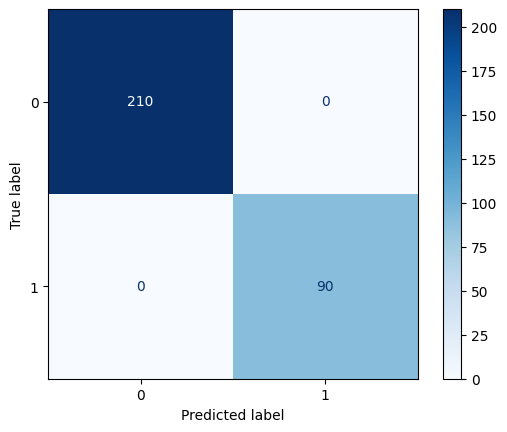

In [334]:
# Confusion Matrix
# Summarizes prediction results by showing true positives, false positives, true negatives and false negatives.
# It helps visualize how well the classifier distinguishes between different classes.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [row[-1] for row in test_data]
y_pred = predictions

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [335]:
y_true

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


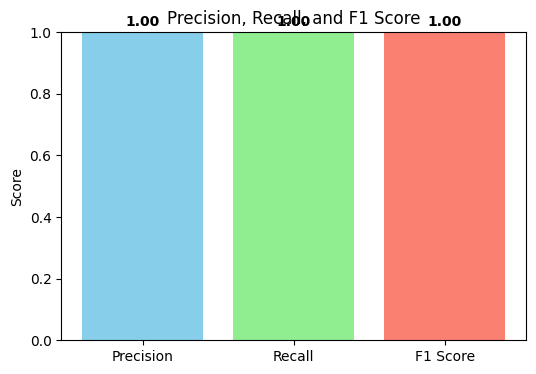

In [336]:
# Precision, Recall and F1 score
# The F1 score is the harmonic mean of precision and recall, balancing both metrics into a single value.
# It’s useful when the class distribution is imbalanced or when false positives and false negatives are costly.
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

actual = [row[-1] for row in test_data]
predicted = predictions

precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()

**Gaussian NB /sklearn/**

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [338]:
sk_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/diabetes.csv")
sk_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outlier
0,4,122,61,7,52,27.822196,0.635762,48,0,0
1,1,104,56,11,0,24.245030,0.089848,60,0,0
2,3,109,62,23,0,18.876902,0.332317,61,0,0
3,3,117,87,21,108,30.492157,0.405408,25,1,0
4,2,114,56,28,10,23.147904,0.120256,25,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,87,66,8,82,25.919825,0.237532,65,1,0
996,3,156,75,21,5,16.830370,0.165928,61,1,0
997,0,105,55,12,198,25.625502,0.380023,22,1,0
998,3,151,64,25,0,34.498791,0.321169,39,0,0


In [339]:
sk_df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64
Outlier,int64


In [340]:
sk_df.drop("Outlier", axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,122,61,7,52,27.822196,0.635762,48,0
1,1,104,56,11,0,24.245030,0.089848,60,0
2,3,109,62,23,0,18.876902,0.332317,61,0
3,3,117,87,21,108,30.492157,0.405408,25,1
4,2,114,56,28,10,23.147904,0.120256,25,0
...,...,...,...,...,...,...,...,...,...
995,1,87,66,8,82,25.919825,0.237532,65,1
996,3,156,75,21,5,16.830370,0.165928,61,1
997,0,105,55,12,198,25.625502,0.380023,22,1
998,3,151,64,25,0,34.498791,0.321169,39,0


In [341]:
X = sk_df.drop("Outcome", axis=1)
y = sk_df['Outcome']

In [342]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outlier
0,4,122,61,7,52,27.822196,0.635762,48,0
1,1,104,56,11,0,24.245030,0.089848,60,0
2,3,109,62,23,0,18.876902,0.332317,61,0
3,3,117,87,21,108,30.492157,0.405408,25,0
4,2,114,56,28,10,23.147904,0.120256,25,0
...,...,...,...,...,...,...,...,...,...
995,1,87,66,8,82,25.919825,0.237532,65,0
996,3,156,75,21,5,16.830370,0.165928,61,0
997,0,105,55,12,198,25.625502,0.380023,22,0
998,3,151,64,25,0,34.498791,0.321169,39,0


In [343]:
y

,Outcome
0,0
1,0
2,0
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [344]:
# Encoding and Splitting the Dataset
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [345]:
# Creating and Training the Model
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [346]:
# Making predictions
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction is: {accuracy}")

The Accuracy of Prediction is: 0.6466666666666666
